In [9]:
# pandas to_datetime()
import pandas as pd
idx = pd.to_datetime(['2000-05-10 12:00:30', '2010-01-01 08:12:34', '', None])
idx

DatetimeIndex(['2000-05-10 12:00:30', '2010-01-01 08:12:34', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

In [6]:
idx.isnull()

array([False, False,  True,  True])

# Time Series Basics

In [8]:
import numpy as np
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.373766
2011-01-05   -1.264723
2011-01-07    0.650804
2011-01-08   -0.415439
2011-01-10    0.872782
2011-01-12    0.659477
dtype: float64

In [10]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [12]:
ts.index[0]  # a pandas Timestamp object

Timestamp('2011-01-02 00:00:00')

## Indexing, selecting, subsetting

In [24]:
# the following return the same
ts[2]
ts[ts.index[2]]
ts['2011-01-07']
ts['20110107']

0.6508044247671989

In [25]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('2000-01-01', periods=1000))
longer_ts[:10]

2000-01-01   -0.832591
2000-01-02    0.348359
2000-01-03    0.705943
2000-01-04    0.584146
2000-01-05    0.270903
2000-01-06   -0.927492
2000-01-07    0.750245
2000-01-08    0.476494
2000-01-09   -0.155475
2000-01-10   -1.008983
Freq: D, dtype: float64

In [28]:
longer_ts['2001'][:5]

2001-01-01    0.675866
2001-01-02    1.367049
2001-01-03   -1.826323
2001-01-04   -0.472024
2001-01-05   -0.214990
Freq: D, dtype: float64

In [29]:
longer_ts['2001-05'][:5]

2001-05-01   -0.074589
2001-05-02    1.418682
2001-05-03    2.849506
2001-05-04    0.263913
2001-05-05   -0.414803
Freq: D, dtype: float64

In [33]:
longer_ts[datetime(2001, 3, 1):datetime(2001, 3, 5)]
longer_ts['2001-03-01':'2001-03-05']  # same 
# Does it matter whether the time series is ordered chornologically?

2001-03-01   -0.099840
2001-03-02   -0.172835
2001-03-03    0.283785
2001-03-04    0.955325
2001-03-05    0.469126
Freq: D, dtype: float64

In [35]:
longer_ts.truncate(after='2000-01-05')

2000-01-01   -0.832591
2000-01-02    0.348359
2000-01-03    0.705943
2000-01-04    0.584146
2000-01-05    0.270903
Freq: D, dtype: float64

In [36]:
# DataFrame with time index
dates = pd.date_range('2000-01-01', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['2001-05']

,Colorado,Texas,New York,Ohio
2001-05-02,1.293342,0.142261,0.673107,0.326799
2001-05-09,1.839807,1.151669,0.180423,-0.578674
2001-05-16,2.161119,-0.389969,-1.367924,-0.319405
2001-05-23,0.235542,-0.093754,-0.209002,0.135409
2001-05-30,0.229981,-0.134746,1.106641,0.095064


## Dupllicated indices

In [37]:
dates = pd.DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02',
                          '2000-01-02', '2000-01-03'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [39]:
dup_ts.index.is_unique

False

In [40]:
dup_ts['2000-01-01']

0

In [41]:
dup_ts['2000-01-02']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [42]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# Date Ranges, Frequencies, and Shifting
## Creating date ranges

In [48]:
# all the following return the same
pd.date_range('2014-04-01', '2014-04-05')
pd.date_range(start='2014-04-01', periods=5)
pd.date_range(end='2014-04-05', periods=5)

DatetimeIndex(['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04',
               '2014-04-05'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range(start='2014-04-01 12:34:56', periods=5)

DatetimeIndex(['2014-04-01 12:34:56', '2014-04-02 12:34:56',
               '2014-04-03 12:34:56', '2014-04-04 12:34:56',
               '2014-04-05 12:34:56'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# normalize to beginning of days
pd.date_range(start='2014-04-01 12:34:56', periods=5, normalize=True)

DatetimeIndex(['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04',
               '2014-04-05'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and date offset

List of frequencies:
* [offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) 
* [anchored offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)

In [54]:
pd.date_range(start='2015-06-01', periods=8, freq='1H30min')

DatetimeIndex(['2015-06-01 00:00:00', '2015-06-01 01:30:00',
               '2015-06-01 03:00:00', '2015-06-01 04:30:00',
               '2015-06-01 06:00:00', '2015-06-01 07:30:00',
               '2015-06-01 09:00:00', '2015-06-01 10:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [50]:
pd.date_range('2010-01-01', '2010-02-01', freq='W-MON')  # all Monday's within the range

DatetimeIndex(['2010-01-04', '2010-01-11', '2010-01-18', '2010-01-25',
               '2010-02-01'],
              dtype='datetime64[ns]', freq='W-MON')

In [55]:
pd.date_range('2010-01-01', '2010-06-30', freq='WOM-1WED')  # 1st Wed in months

DatetimeIndex(['2010-01-06', '2010-02-03', '2010-03-03', '2010-04-07',
               '2010-05-05', '2010-06-02'],
              dtype='datetime64[ns]', freq='WOM-1WED')

In [90]:
pd.date_range('2010-01-01', '2010-06-30', freq='M')  # ends of months

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30'],
              dtype='datetime64[ns]', freq='M')

In [106]:
pd.date_range('2010-01-01', '2010-06-30', freq='MS')  # start days of months

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [99]:
 # ends of quarters, where Q4 is defined to end in Dec
pd.date_range('2010-01-01', '2012-01-01', freq='Q')  
pd.date_range('2010-01-01', '2012-01-01', freq='Q-DEC') 

DatetimeIndex(['2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [104]:
# ends of years (i.e., ends of Dec)
pd.date_range('2010-01-01', '2015-12-31', freq='A') 
pd.date_range('2010-01-01', '2015-12-31', freq='Y') 
pd.date_range('2010-01-01', '2015-12-31', freq='A-DEC')

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [91]:
pd.date_range('2010-01-01', '2015-12-31', freq='A-JUN')  # annually, at ends of Jun

DatetimeIndex(['2010-06-30', '2011-06-30', '2012-06-30', '2013-06-30',
               '2014-06-30', '2015-06-30'],
              dtype='datetime64[ns]', freq='A-JUN')

## Shifting
### Shifting time series

In [56]:
ts

2011-01-02    0.373766
2011-01-05   -1.264723
2011-01-07    0.650804
2011-01-08   -0.415439
2011-01-10    0.872782
2011-01-12    0.659477
dtype: float64

In [60]:
ts.shift(-2, freq='D')

2010-12-31    0.373766
2011-01-03   -1.264723
2011-01-05    0.650804
2011-01-06   -0.415439
2011-01-08    0.872782
2011-01-10    0.659477
dtype: float64

In [59]:
ts.shift(1, freq='M')  # note: 'M' refers to last days of months

2011-01-31    0.373766
2011-01-31   -1.264723
2011-01-31    0.650804
2011-01-31   -0.415439
2011-01-31    0.872782
2011-01-31    0.659477
dtype: float64

In [112]:
# shifting DateTimeIndex:
rng = pd.date_range('2010-01-01', '2010-06-30', freq='MS')  
rng.shift(1, freq='D')

DatetimeIndex(['2010-01-02', '2010-02-02', '2010-03-02', '2010-04-02',
               '2010-05-02', '2010-06-02'],
              dtype='datetime64[ns]', freq=None)

### Shifting dates with offsets

In [69]:
from pandas.tseries import offsets
now = datetime(2012, 3, 15)
now + offsets.Day() * 3

Timestamp('2012-03-18 00:00:00')

In [70]:
offsets.MonthEnd().rollforward(now)

Timestamp('2012-03-31 00:00:00')

In [71]:
offsets.MonthEnd().rollback(now)

Timestamp('2012-02-29 00:00:00')

In [72]:
now + offsets.MonthEnd()  # roll forward

Timestamp('2012-03-31 00:00:00')

In [74]:
now + offsets.MonthEnd() * 2  # the first increment is a roll forward

Timestamp('2012-04-30 00:00:00')

# Time Zone Handling
## Time zone localization and conversion

In [4]:
import pytz
import pandas as pd
import numpy as np

In [59]:
time_index = pd.date_range('2012-03-09 9:30', periods=6, freq='D')
ts_no_tz = pd.Series(np.random.randn(len(rng)), index=time_index)
ts_no_tz

2012-03-09 09:30:00    1.305764
2012-03-10 09:30:00    0.509825
2012-03-11 09:30:00    0.942233
2012-03-12 09:30:00    1.015704
2012-03-13 09:30:00    0.711212
2012-03-14 09:30:00    0.362735
Freq: D, dtype: float64

In [60]:
print(time_index.tz)
print(ts_no_tz.index.tz)

None
None


In [61]:
# date range with a time zone set:
time_index = pd.date_range('2012-03-09 9:30', periods=6, freq='D', tz='UTC')
time_index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [16]:
# set a time zone for a time series with no time zone set:
ts_utc = ts_no_tz.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.980117
2012-03-10 09:30:00+00:00   -1.117553
2012-03-11 09:30:00+00:00    0.211464
2012-03-12 09:30:00+00:00   -0.967987
2012-03-13 09:30:00+00:00    0.118540
2012-03-14 09:30:00+00:00   -0.447027
Freq: D, dtype: float64

In [18]:
# convert to another time zone:
ts_utc.tz_convert('America/New_York')
# Note: There is a daylight saving time transition

2012-03-09 04:30:00-05:00    0.980117
2012-03-10 04:30:00-05:00   -1.117553
2012-03-11 05:30:00-04:00    0.211464
2012-03-12 05:30:00-04:00   -0.967987
2012-03-13 05:30:00-04:00    0.118540
2012-03-14 05:30:00-04:00   -0.447027
Freq: D, dtype: float64

## Time-zone-aware Timestamp objects

In [27]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_ny = stamp_utc.tz_convert('America/New_York')
stamp_ny

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [25]:
# set time zone on creation
stamp_taipei = pd.Timestamp('2011-03-12 12:00', tz='Asia/Taipei')
stamp_taipei

Timestamp('2011-03-12 12:00:00+0800', tz='Asia/Taipei')

In [31]:
# A time-zone-aware Timestamp stores internally a UTC time value as nanoseconds 
# since 1970-01-01:
print(stamp_utc.value) 
print(stamp_utc.tz_convert('America/New_York').value)
print(stamp_utc.tz_convert('Asia/Taipei').value)

1299902400000000000
1299902400000000000
1299902400000000000


In [39]:
# time arithmetics using time offset (they respect DST)
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [36]:
stamp + Hour()

Timestamp('2012-11-04 01:30:00-0400', tz='US/Eastern')

In [37]:
stamp + Hour() * 2
# there's a transition out of DST

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## Operation between different time zones
* If two time series with different time zones are combined, the result will be UTC.

In [62]:
time_index = pd.date_range('2012-03-09 9:30', periods=6, freq='D')
ts_taipei = pd.Series(np.random.randn(len(time_index)), 
                      index=pd.DatetimeIndex(time_index, tz='Asia/Taipei'))
ts_ny = ts_taipei.tz_convert('America/New_York')

In [63]:
ts_taipei

2012-03-09 09:30:00+08:00    1.433154
2012-03-10 09:30:00+08:00    0.437484
2012-03-11 09:30:00+08:00    4.277078
2012-03-12 09:30:00+08:00   -1.119177
2012-03-13 09:30:00+08:00   -1.037285
2012-03-14 09:30:00+08:00   -0.062873
Freq: D, dtype: float64

In [64]:
ts_ny

2012-03-08 20:30:00-05:00    1.433154
2012-03-09 20:30:00-05:00    0.437484
2012-03-10 20:30:00-05:00    4.277078
2012-03-11 21:30:00-04:00   -1.119177
2012-03-12 21:30:00-04:00   -1.037285
2012-03-13 21:30:00-04:00   -0.062873
Freq: D, dtype: float64

In [65]:
ts_sum = ts_taipei + ts_ny
ts_sum

2012-03-09 01:30:00+00:00    2.866309
2012-03-10 01:30:00+00:00    0.874968
2012-03-11 01:30:00+00:00    8.554156
2012-03-12 01:30:00+00:00   -2.238353
2012-03-13 01:30:00+00:00   -2.074570
2012-03-14 01:30:00+00:00   -0.125746
Freq: D, dtype: float64

# Periods
## Periods
A Period represents a time span. It is specified by a time instance and a "frequency".

In [115]:
p = pd.Period('2010-01-23', freq='D')
print(p.start_time)
print(p.end_time)
p

2010-01-23 00:00:00
2010-01-23 23:59:59.999999999


Period('2010-01-23', 'D')

In [118]:
# the following are the same
p = pd.Period(2010, freq='A-DEC')
p = pd.Period('2010', freq='A-DEC')
p = pd.Period('2010-01-23', freq='A-DEC')
p = pd.Period('2010-12-31', freq='A-DEC')

print(p.start_time)
print(p.end_time)
p

2010-01-01 00:00:00
2010-12-31 23:59:59.999999999


Period('2010', 'A-DEC')

In [119]:
p + 2

Period('2012', 'A-DEC')

In [120]:
d = pd.Period(2014, freq='A-DEC') - p
print(type(d))
d

<class 'pandas.tseries.offsets.YearEnd'>


<4 * YearEnds: month=12>

In [136]:
# PeriodIndex:
pd.PeriodIndex(['2010-01-01', '2010-03-20', '2010-11-24'], freq='M')

PeriodIndex(['2010-01', '2010-03', '2010-11'], dtype='period[M]', freq='M')

In [140]:
# using period_range()
periods = pd.period_range('2000-01-01', '2000-06-30', freq='M')
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [130]:
print(periods[0].start_time, '--', periods[0].end_time)

2000-01-01 00:00:00 -- 2000-01-31 23:59:59.999999999


In [133]:
# using PeriodIndex as the index of a time series:
ts = pd.Series(np.random.randn(6), index=periods)
ts

2000-01   -1.022932
2000-02   -1.119217
2000-03   -1.554547
2000-04    1.608993
2000-05    2.017961
2000-06    1.507387
Freq: M, dtype: float64

## Period conversion
* Use `asfreq()` to change the length ("frequency") of a period, or a whole PeriodIndex or series.

**Longer period to shorter period:**

In [144]:
p = pd.Period('2010-01-01', freq='A-JUL')
p

Period('2010', 'A-JUL')

In [145]:
p.asfreq('M', how='start')

Period('2009-08', 'M')

In [146]:
p.asfreq('M', how='end')

Period('2010-07', 'M')

**Shorter period to longer period:**

In [148]:
p = pd.Period('2010-03-01', freq='M')
p

Period('2010-03', 'M')

In [150]:
p.asfreq('A-JAN')

Period('2011', 'A-JAN')

## Conversion between Timestamps and Periods

In [155]:
ts = pd.Series(np.random.randn(4), 
               index=pd.date_range('2010-01-01', periods=4, freq='M'))
ts

2010-01-31   -1.120743
2010-02-28    0.793224
2010-03-31    1.085819
2010-04-30   -0.162739
Freq: M, dtype: float64

In [158]:
ts2 = ts.to_period('M')  # convert the index from DateTimeIndex to PeriodIndex
ts2

2010-01   -1.120743
2010-02    0.793224
2010-03    1.085819
2010-04   -0.162739
Freq: M, dtype: float64

In [159]:
ts2.to_timestamp(how='end')

2010-01-31 23:59:59.999999999   -1.120743
2010-02-28 23:59:59.999999999    0.793224
2010-03-31 23:59:59.999999999    1.085819
2010-04-30 23:59:59.999999999   -0.162739
Freq: M, dtype: float64

## Creating PeriodIndex from array

In [160]:
df = pd.DataFrame({'year': [2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001],
                   'quarter': [1, 2, 3, 4, 1, 2, 3, 4],
                   'value': np.random.randn(8)})
df

,year,quarter,value
0,2000,1,1.153100
1,2000,2,-0.649589
2,2000,3,-1.732600
3,2000,4,-0.519406
4,2001,1,-1.536993
5,2001,2,-0.525326
6,2001,3,0.539458
7,2001,4,-0.193140


In [161]:
index = pd.PeriodIndex(year=df['year'], quarter=df['quarter'], freq='Q-DEC')
index

PeriodIndex(['2000Q1', '2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q2',
             '2001Q3', '2001Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [164]:
df.index = index
df

,year,quarter,value
2000Q1,2000,1,1.153100
2000Q2,2000,2,-0.649589
2000Q3,2000,3,-1.732600
2000Q4,2000,4,-0.519406
2001Q1,2001,1,-1.536993
2001Q2,2001,2,-0.525326
2001Q3,2001,3,0.539458
2001Q4,2001,4,-0.193140


# Resampling
## Downsampling
* Downsampling is similar to applying `groupby()` followed by aggregation.
* The specified frequency in `resample()` defines *bin edges* that are used to group the data.
* Each bin is half-open. Specify which end is closed via the argument `closed`.

In [57]:
import pandas as pd
import numpy as np
n = 50
ts = pd.Series(np.arange(n, dtype=np.float), 
               pd.date_range('2000-03-31', periods=n, freq='D'))
ts.head(10)

2000-03-31    0.0
2000-04-01    1.0
2000-04-02    2.0
2000-04-03    3.0
2000-04-04    4.0
2000-04-05    5.0
2000-04-06    6.0
2000-04-07    7.0
2000-04-08    8.0
2000-04-09    9.0
Freq: D, dtype: float64

In [58]:
ts.resample('M', closed='right', label='right').count()

2000-03-31     1
2000-04-30    30
2000-05-31    19
Freq: M, dtype: int64

In [59]:
ts.resample('MS', closed='left', label='left').count()

2000-03-01     1
2000-04-01    30
2000-05-01    19
Freq: MS, dtype: int64

* `label` sets which edge is to be used as the label (index) in the result.
* It can be confusing to set `closed` and `label` differently, unless suitable `loffset` (label offset) is also given.

In [61]:
ts.resample('MS', closed='left', label='right', loffset='-1d').count()
# now the label is the end date of each bin

2000-03-31     1
2000-04-30    30
2000-05-31    19
Freq: M, dtype: int64

In [74]:
# example
index = pd.date_range('2001-01-01 00:12', periods=20, freq='T')
ts = pd.Series(np.arange(len(index), dtype=np.float), index=index)
ts.head(10)

2001-01-01 00:12:00    0.0
2001-01-01 00:13:00    1.0
2001-01-01 00:14:00    2.0
2001-01-01 00:15:00    3.0
2001-01-01 00:16:00    4.0
2001-01-01 00:17:00    5.0
2001-01-01 00:18:00    6.0
2001-01-01 00:19:00    7.0
2001-01-01 00:20:00    8.0
2001-01-01 00:21:00    9.0
Freq: T, dtype: float64

In [78]:
ts.resample('5min', closed='left', label='left').count()
# the bin edges are hh:00, hh:05, hh:10, ...

2001-01-01 00:10:00    3
2001-01-01 00:15:00    5
2001-01-01 00:20:00    5
2001-01-01 00:25:00    5
2001-01-01 00:30:00    2
Freq: 5T, dtype: int64

In [73]:
# use different labels:
ts.resample('5min', closed='left', label='right', loffset='-1ms').count()
ts.resample('5min', closed='left', label='right').count().shift(-1, freq='ms')  # same

2001-01-01 00:14:59.999    3
2001-01-01 00:19:59.999    5
2001-01-01 00:24:59.999    5
2001-01-01 00:29:59.999    5
2001-01-01 00:34:59.999    2
Freq: 5T, dtype: int64

**open-high-low-close (OHLC) resampling:**

Computes the 1st value ("open"), maximum value ("high"), minimum value ("low"), and the last value ("close") in each bin.

In [72]:
ts.resample('5min', closed='left', label='left').ohlc()

,open,high,low,close
2001-01-01 00:10:00,0.0,2.0,0.0,2.0
2001-01-01 00:15:00,3.0,7.0,3.0,7.0
2001-01-01 00:20:00,8.0,12.0,8.0,12.0
2001-01-01 00:25:00,13.0,17.0,13.0,17.0
2001-01-01 00:30:00,18.0,19.0,18.0,19.0


## Upsampling and interpolation

In [79]:
df = pd.DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('2000-01-01', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.088876,-0.561327,0.683567,-2.122694
2000-01-12,-0.520288,0.785094,-1.048369,0.816699


In [80]:
df.resample('D').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.088876,-0.561327,0.683567,-2.122694
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.520288,0.785094,-1.048369,0.816699


In [81]:
df.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.088876,-0.561327,0.683567,-2.122694
2000-01-06,-0.088876,-0.561327,0.683567,-2.122694
2000-01-07,-0.088876,-0.561327,0.683567,-2.122694
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.520288,0.785094,-1.048369,0.816699


In [83]:
df.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.088876,-0.561327,0.683567,-2.122694
2000-01-13,-0.520288,0.785094,-1.048369,0.816699


## Resampling with periods
In resampling a PeriodIndex'ed data, the target frequency and source frequency must "line up" (i.e., they must be *subperiods* and *superperiods*).


In [92]:
# a DataFrame whose index is a PeriodIndex
df = pd.DataFrame(np.random.randn(24, 2),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'New York'])
df.head()

,Colorado,New York
2000-01,-0.291003,0.223475
2000-02,0.995238,-1.151144
2000-03,-0.113900,0.469763
2000-04,0.369974,0.445541
2000-05,0.375424,1.071455


In [96]:
df_annual = df.resample('A-DEC').mean()
df_annual

,Colorado,New York
2000,0.193225,-0.221933
2001,0.343331,-0.180381


In [98]:
df_annual.resample('Q-DEC', convention='start').ffill()
# "convention='start'": before resampling, put the value of each year in the 1st 
# quarter of that year

,Colorado,New York
2000Q1,0.193225,-0.221933
2000Q2,0.193225,-0.221933
2000Q3,0.193225,-0.221933
2000Q4,0.193225,-0.221933
2001Q1,0.343331,-0.180381
2001Q2,0.343331,-0.180381
2001Q3,0.343331,-0.180381
2001Q4,0.343331,-0.180381


In [99]:
df_annual.resample('Q-DEC', convention='end').ffill()
# "convention='end'": before resampling, put the value of each year in the last 
# quarter of that year

,Colorado,New York
2000Q4,0.193225,-0.221933
2001Q1,0.193225,-0.221933
2001Q2,0.193225,-0.221933
2001Q3,0.193225,-0.221933
2001Q4,0.343331,-0.180381


## Grouped resampling

In [10]:
import pandas as pd
import numpy as np
dates = pd.date_range('2015-05-01', periods=10, freq='1min')
df = pd.DataFrame({'time': dates.repeat(3),
                   'key': ['a', 'b', 'c'] * 10,
                   'value': np.random.randn(30)})
df.head(10)

,time,key,value
0,2015-05-01 00:00:00,a,1.123923
1,2015-05-01 00:00:00,b,0.409039
2,2015-05-01 00:00:00,c,-0.065722
3,2015-05-01 00:01:00,a,-0.375601
4,2015-05-01 00:01:00,b,0.042901
5,2015-05-01 00:01:00,c,0.593557
6,2015-05-01 00:02:00,a,-0.389778
7,2015-05-01 00:02:00,b,-0.252398
8,2015-05-01 00:02:00,c,0.090952
9,2015-05-01 00:03:00,a,0.154166


In [21]:
time_grouper_5min = pd.Grouper(key='time', freq='5min', closed='left', label='left')
df.groupby(['key', time_grouper_5min]).mean() \
    .rename({'value': 'value_mean'}, axis=1)

value_mean
key time                           
a   2015-05-01 00:00:00    0.033367
    2015-05-01 00:05:00    0.566483
b   2015-05-01 00:00:00   -0.109967
    2015-05-01 00:05:00   -0.447771
c   2015-05-01 00:00:00    0.258965
    2015-05-01 00:05:00    0.016268

# Moving Windows
## rolling() and expanding()

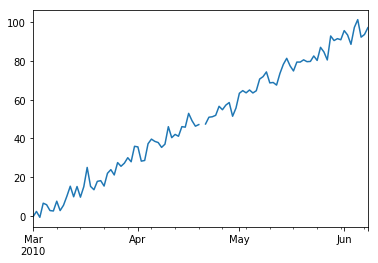

In [138]:
import matplotlib.pyplot as plt

n = 100
ts = pd.Series(np.arange(n) + np.random.randn(n) * 3.0,
               index=pd.date_range('2010-03-01', periods=n, freq='D'))
ts[50] = np.nan
ts.plot()
plt.show()

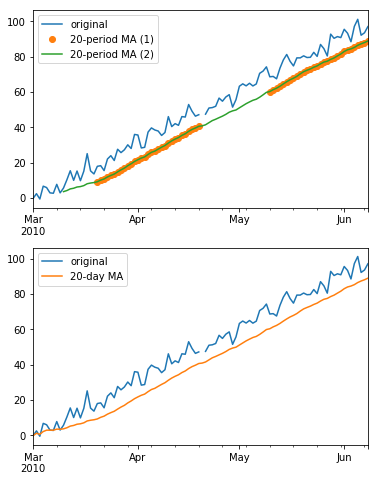

In [157]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# moving average of 20 (preceding) periods
ts.plot(ax=axes[0], label='original')
ts.rolling(20).mean().plot(ax=axes[0], style='o', label='20-period MA (1)')
ts.rolling(20, min_periods=10).mean().plot(ax=axes[0], label='20-period MA (2)')
    # `min_periods`: the minimum number of non-NA values within window to 
    # give non-NA result. The default is equal to the given number of periods
axes[0].legend()

# moving average of 20 (preceding) days
ts.plot(ax=axes[1], label='original')
ts.rolling('20D').mean().plot(ax=axes[1], label='20-day MA')
    # this accounts for NA values
axes[1].legend()

plt.show()

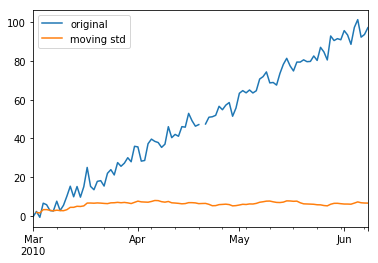

In [158]:
# moving std of 20 (past) days
fig, ax = plt.subplots(1, 1)
ts.plot(ax=ax, label='original')
ts.rolling('20D').std().plot(ax=ax, label='moving std')
ax.legend()
plt.show()

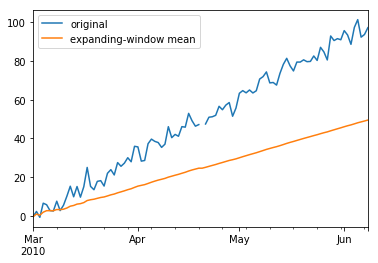

In [146]:
# expanding-window mean
fig, ax = plt.subplots(1, 1)
ts.plot(ax=ax, label='original')
ts.expanding().mean().plot(ax=ax, label='expanding-window mean')
ax.legend()
plt.show()

## Exponentially weighted moving statistics
* Exponentially weighted statistics put more weight on more recent observations.

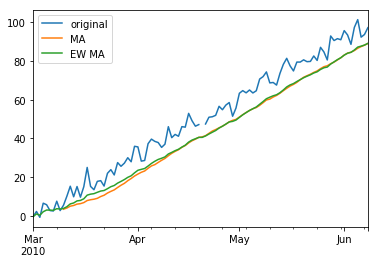

In [164]:
fig, ax = plt.subplots(1, 1)
ts.plot(ax=ax, label='original')
ts.rolling(20, min_periods=10).mean().plot(ax=ax, label='MA')
ts.ewm(span=20).mean().plot(ax=ax, label='EW MA')
ax.legend()
plt.show()

## Binary moving windows
Example: Computing rolling correlation between 2 time series.

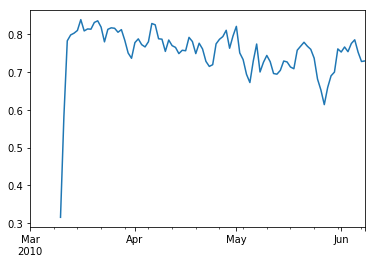

In [171]:
ts1 = pd.Series(np.arange(n) + np.random.randn(n) * 3.0,
                index=ts.index)
corr = ts.rolling(20, min_periods=10).corr(ts1)
corr.plot()
plt.show()

## User-defined moving windows
The semantics is like 
```
ts.rolling(100).apply(my_function)
```
where `my_function()` must take an array and return a single value.